<H1>Distances periodicity</H1>
We want to find if there is certain periodicity in the acceleration of different particles

In [1]:
# import necessary modules
%pylab inline
import pandas as pd
from scipy.stats import linregress

from migration import Particle # my custom object

Populating the interactive namespace from numpy and matplotlib


<H2>Read different particles</H2>

In [2]:
# read CSV file in pandas
mydf = pd.read_csv('.data/Julie_R1_Bef_S4_cell123_Position.csv', skiprows=2) 
IDs = mydf['TrackID'].unique()
print(IDs)

[1000000000 1000000001 1000000002]


In [3]:
x, y, z = [Particle(df=mydf, ID=i) for i in IDs]

<H2>Plot particles</H2>

Track ID: 1000000000
Traveled time 1440.0000 min
Traveled distance 133.6888 um
Average speed 0.0931 um/min

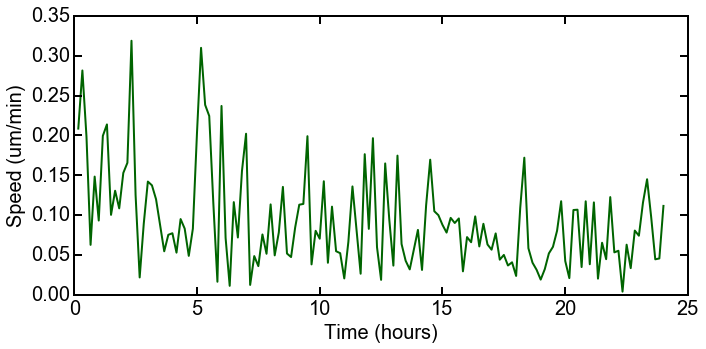

In [4]:
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(x.time, x.speed, color='darkgreen');
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/min)');
x

Track ID: 1000000001
Traveled time 1440.0000 min
Traveled distance 346.2176 um
Average speed 0.2406 um/min

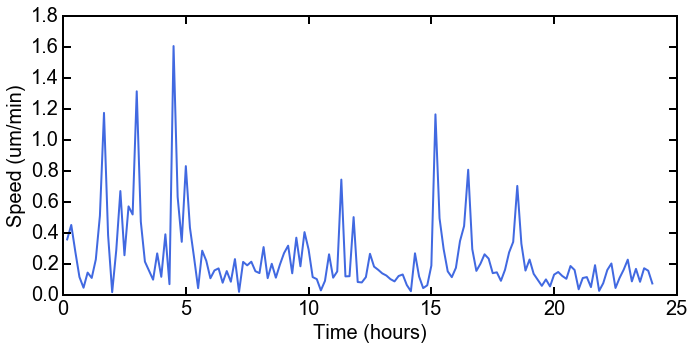

In [5]:
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(y.time, y.speed, color='royalblue');
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/min)');
y

Track ID: 1000000002
Traveled time 310.0000 min
Traveled distance 66.0373 um
Average speed 0.2179 um/min

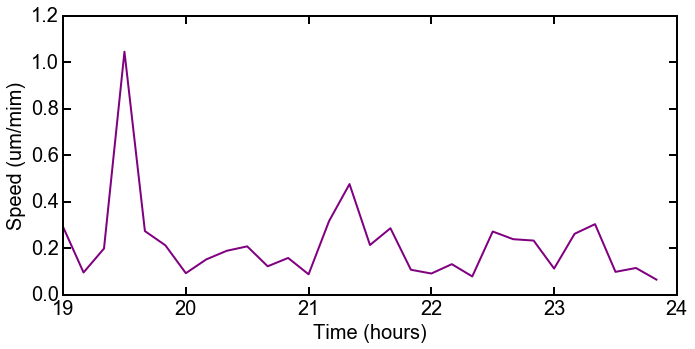

In [6]:
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(z.time, z.speed, color='purple');
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/mim)');
z

<H2>Pearson correlation</H2>
We will calculate the correlation at the same sampling times

In [7]:
#take common sampling points, withouth the last one to compare velocities
common = np.intersect1d(x.t[:-1], y.t[:-1]) # take common sampling times without last point

x_idx = [list(x.t).index(i) for i in common]
y_idx = [list(y.t).index(i) for i in common]

xval = x.speed[x_idx]
yval = y.speed[y_idx]


a=0.171141, m=0.754679


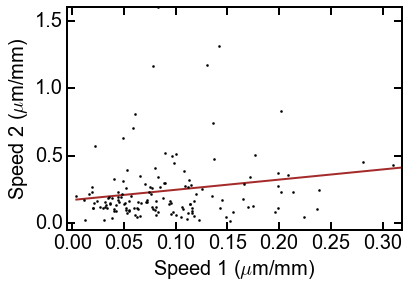

In [8]:
# linear fit
f = poly1d(np.polyfit(xval,yval,1)) # 1 degree polynomial function
print("a=%f, m=%f" % (f[0],f[1]))
t = np.linspace(start = np.min(xval), stop = np.max(yval), num = 100)
plt.plot(t, f(t), color='brown', lw=2);

plt.plot(xval, yval,'ko', markersize=2)
plt.xlabel('Speed 1 ($\mu$m/mm)')
plt.ylabel('Speed 2 ($\mu$m/mm)')
plt.xlim(-0.005,np.max(xval));
plt.ylim(-0.05, np.max(yval));

In [9]:
linregress(xval, yval)

LinregressResult(slope=0.75467905101897403, intercept=0.17114138256664074, rvalue=0.18882320680924444, pvalue=0.024418182509404966, stderr=0.33171056472943056)

<H2>Coefficient of determination</H2>
Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. It is therefore the fraction of total variation in Y that is captured by the model (linear).

In [10]:
0.18882320680924444*0.18882320680924444 #r squared

0.035654203429726694

In [11]:
from sklearn.metrics import r2_score
r2_score(yval, f(xval))

0.035654203429726694

<H2>Cross correlation</H2>
*Correlation* is a measurement of how similar two signals. The *cross correlation* allows us to measure the similiarity between two signals at different lag positions.

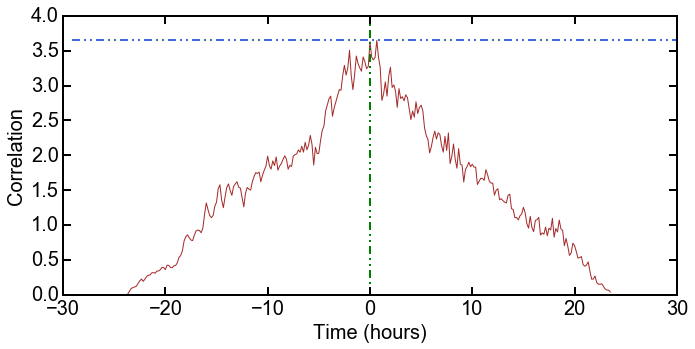

In [12]:
# compute signal autocorrelation
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)

dt = 1/6. # in hours
coor = np.correlate(x.speed, y.speed, 'full')
maxlag = int(coor.size/2)

lag = np.arange(-maxlag, maxlag+coor.size%2)*dt

ax.plot(lag, coor, lw=1, color='brown');

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Correlation')

# vertical line around lag = 0
vline = ax.axvline(x=0, ymin=np.min(lag), ymax = np.max(lag), linewidth=2, color='green')
vline.set_dashes([8, 4, 2, 4, 2, 4]) # mycustom line

# horizontal line around max,
hline = ax.axhline(y=np.max(coor), xmin =np.min(coor) , xmax =np.max(coor), linewidth=2, color='royalblue')
hline.set_dashes([8, 4, 2, 4, 2, 4]) # mycustom line


In [13]:
# Calculate lag position of maximal correlation
def lag_ix(x,y):

    corr = np.correlate(x,y,mode='full')
    pos_ix = np.argmax( np.abs(corr) )
    lag_ix = pos_ix - (corr.size-1)/2
    return lag_ix

time = lag_ix(x.speed,y.speed)*dt # in hours
print('Lag %2.4f hours'%time)
print('Lag %2.4f min'%(time/6.))

Lag 0.8333 hours
Lag 0.1389 min


<H2>Fourier transform</H2>

In [14]:
n = len(y.speed) # length of the signal
k = np.arange(n)
dt = 1/6. # in hours
T = n*dt 
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(y.speed)/n # fft computing and normalization
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)Y0 = Y0[range(n/2)]

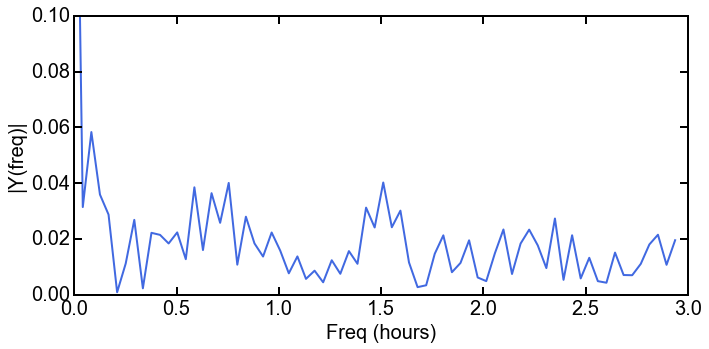

In [15]:
fig = figure(figsize=(11,5))

plt.plot(frq, abs(Y0),color = 'royalblue') # plotting the spectrum


plt.xlabel('Freq (hours)')
plt.ylabel('|Y(freq)|')
plt.ylim(ymax = 0.1);